# Home Work 1


In [ ]:
# Importing the necessary libraries needed
import pandas as pd
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import (confusion_matrix, classification_report,
                             roc_curve, auc, precision_recall_curve)
import matplotlib.pyplot as plt

from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

Task 1: [25 points] Explore the Data
Load the provided dataset and see how many data points and features it has. Count how many
samples belong to each type of cancer and make a simple bar chart.

Number of data points (rows): 2529
Number of features (columns): 12311
Class
KIRC    527
LUAD    510
THCA    501
LUSC    498
PRAD    493
Name: count, dtype: int64


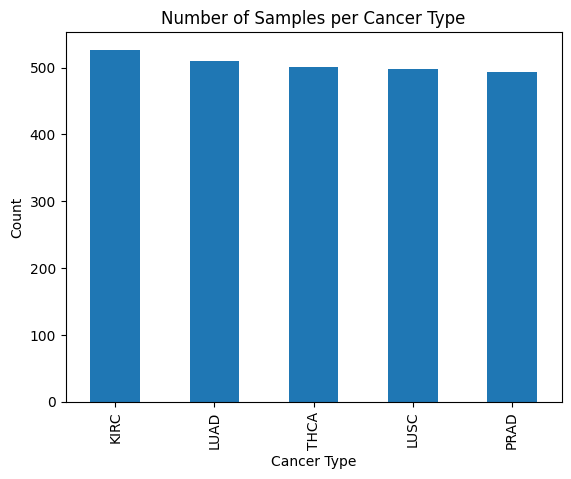

In [ ]:
# Loading the dataset from the csv file and counting the number of datapoints and features
df = pd.read_csv('lncRNA_5_Cancers.csv')
# print(df.shape)

# Check shape (rows = data points, columns = features)
print("Number of data points (rows):", df.shape[0])
print("Number of features (columns):", df.shape[1])

# Looking at the dataset for the columns
# df.head()

# Counting the types of cancer in the dataset
cancer_counts = df['Class'].value_counts()
print(cancer_counts)

# Plot Bar graph
# Plot bar chart
cancer_counts.plot(kind='bar')
plt.title("Number of Samples per Cancer Type")
plt.xlabel("Cancer Type")
plt.ylabel("Count")
plt.show()


Task 2: [25 points] Classification Using All Features Employing SVM
Use those ~12K features to train an SVM with RBF kernel. Report (i) confusion matrix for one
fold, (ii) the macro, micro, and weighted precision/recall/F1 along with the accuracy, (iii) plot
AUC-ROC and AUC-PR curve. Use 5-flod cross-validation.

Confusion Matrix (first fold):
 [[102   1   3   0   0]
 [  0 101   1   0   0]
 [  0   6  93   0   0]
 [  0   3   0  96   0]
 [  0   1   0   0  99]]

Classification Report (macro/micro/weighted):
              precision    recall  f1-score   support

        KIRC       1.00      0.98      0.99       527
        LUAD       0.85      0.97      0.91       510
        LUSC       0.95      0.89      0.92       498
        PRAD       1.00      0.96      0.98       493
        THCA       1.00      0.98      0.99       501

    accuracy                           0.96      2529
   macro avg       0.96      0.96      0.96      2529
weighted avg       0.96      0.96      0.96      2529



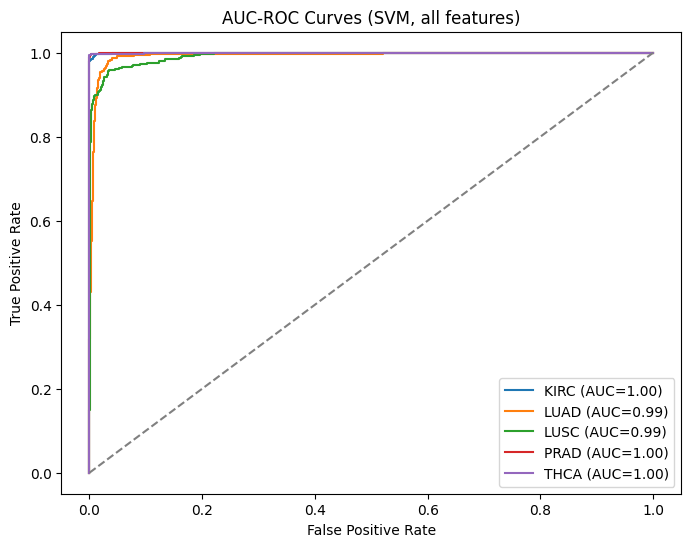

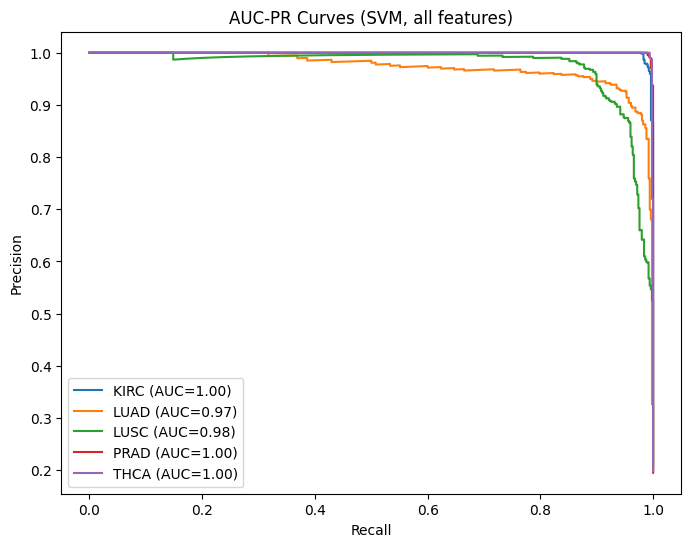

In [ ]:
# import numpy as np
# from sklearn.model_selection import StratifiedKFold, cross_val_predict
# from sklearn.pipeline import Pipeline
# from sklearn.preprocessing import StandardScaler, LabelEncoder
# from sklearn.svm import SVC
# from sklearn.metrics import (confusion_matrix, classification_report,
#                              roc_curve, auc, precision_recall_curve)
# import matplotlib.pyplot as plt
# from sklearn.preprocessing import label_binarize

# Prepare features/labels
X = df.drop(columns=["Ensembl_ID", "Class"])
y = df["Class"]

le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

# Pipeline: scaling + SVM with RBF kernel
svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", probability=True, random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# --- 1) Confusion matrix for first fold ---
train_idx, test_idx = next(cv.split(X, y_enc))
svm.fit(X.iloc[train_idx], y_enc[train_idx])
y_pred_fold = svm.predict(X.iloc[test_idx])

cm = confusion_matrix(y_enc[test_idx], y_pred_fold)
print("Confusion Matrix (first fold):\n", cm)

# --- 2) CV predictions for metrics ---
y_pred_cv = cross_val_predict(svm, X, y_enc, cv=cv, method="predict")
y_prob_cv = cross_val_predict(svm, X, y_enc, cv=cv, method="predict_proba")

print("\nClassification Report (macro/micro/weighted):")
print(classification_report(y_enc, y_pred_cv, target_names=class_names))

# --- 3) ROC & PR curves ---
# Binarize labels
y_bin = label_binarize(y_enc, classes=range(len(class_names)))

# ROC and PR per class
fpr, tpr, roc_auc = {}, {}, {}
precision, recall, pr_auc = {}, {}, {}

for i in range(len(class_names)):
    fpr[i], tpr[i], _ = roc_curve(y_bin[:, i], y_prob_cv[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    precision[i], recall[i], _ = precision_recall_curve(y_bin[:, i], y_prob_cv[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

# Plot ROC
plt.figure(figsize=(8,6))
for i, cls in enumerate(class_names):
    plt.plot(fpr[i], tpr[i], label=f"{cls} (AUC={roc_auc[i]:.2f})")
plt.plot([0,1],[0,1],"--", color="gray")
plt.title("AUC-ROC Curves (SVM, all features)")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Plot PR
plt.figure(figsize=(8,6))
for i, cls in enumerate(class_names):
    plt.plot(recall[i], precision[i], label=f"{cls} (AUC={pr_auc[i]:.2f})")
plt.title("AUC-PR Curves (SVM, all features)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Task 3: [25 points] Autoencoder for Feature Extraction

Train an Autoencoder that reduces the features to 50 latent dimensions. Use those 50 features
to train an SVM with RBF kernel. Report (i) confusion matrix for one fold, (ii) the macro, micro,
and weighted precision/recall/F1 along with the accuracy, (iii) plot AUC-ROC and AUC-PR
curve.

Epoch 1/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 247ms/step - loss: 0.2062
Epoch 2/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0712
Epoch 3/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0597
Epoch 4/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0568
Epoch 5/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0560
Epoch 6/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0510
Epoch 7/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0496
Epoch 8/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0486
Epoch 9/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.0497
Epoch 10/10
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚

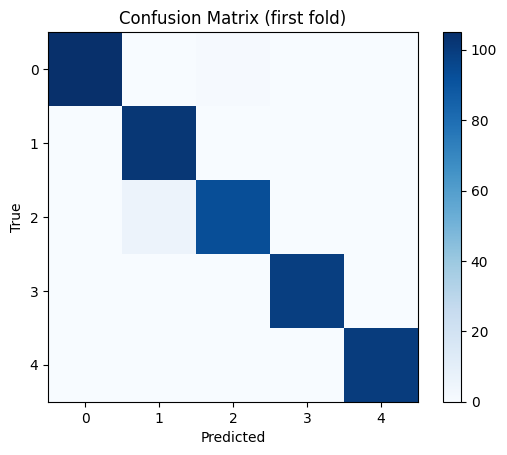

              precision    recall  f1-score   support

        KIRC       1.00      0.99      1.00       527
        LUAD       0.92      0.98      0.95       510
        LUSC       0.97      0.92      0.94       498
        PRAD       1.00      1.00      1.00       493
        THCA       1.00      1.00      1.00       501

    accuracy                           0.98      2529
   macro avg       0.98      0.98      0.98      2529
weighted avg       0.98      0.98      0.98      2529



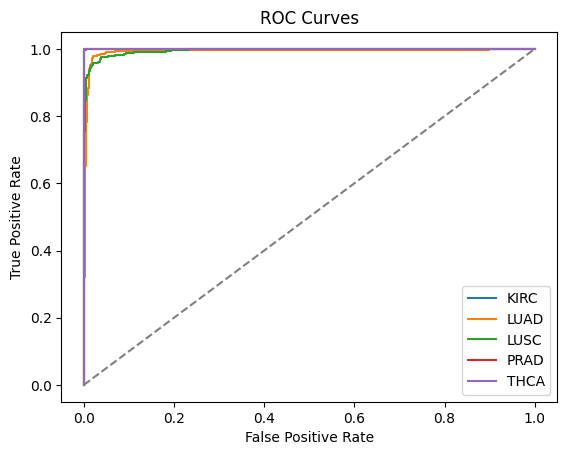

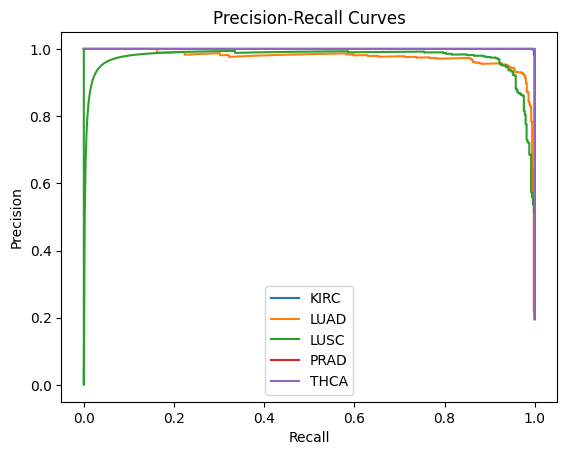

In [ ]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt

# from tensorflow import keras
# from tensorflow.keras import layers

# from sklearn.model_selection import StratifiedKFold, cross_val_predict
# from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
# from sklearn.pipeline import Pipeline
# from sklearn.svm import SVC
# from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc, precision_recall_curve

# --- 1) Build and train Autoencoder ---
input_dim = X.shape[1]
encoding_dim = 50

input_layer = keras.Input(shape=(input_dim,))
encoded = layers.Dense(200, activation="relu")(input_layer)
bottleneck = layers.Dense(encoding_dim, activation="linear")(encoded)
decoded = layers.Dense(200, activation="relu")(bottleneck)
decoded = layers.Dense(input_dim, activation="linear")(decoded)

autoencoder = keras.Model(input_layer, decoded)
encoder = keras.Model(input_layer, bottleneck)

autoencoder.compile(optimizer="adam", loss="mse")
autoencoder.fit(X, X, epochs=10, batch_size=64, shuffle=True, verbose=1)

# Extract 50-dim features
X_ae = encoder.predict(X)

# --- 2) Train SVM with 5-fold CV ---
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", probability=True, random_state=42))
])

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Confusion matrix for the first fold
train_idx, test_idx = next(cv.split(X_ae, y_enc))
svm.fit(X_ae[train_idx], y_enc[train_idx])
y_pred_fold = svm.predict(X_ae[test_idx])
cm = confusion_matrix(y_enc[test_idx], y_pred_fold)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (first fold)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# --- 3) Metrics with cross-validation predictions ---
y_pred_cv = cross_val_predict(svm, X_ae, y_enc, cv=cv, method="predict")
y_prob_cv = cross_val_predict(svm, X_ae, y_enc, cv=cv, method="predict_proba")

print(classification_report(y_enc, y_pred_cv, target_names=class_names))

# --- 4) ROC & PR curves (one-vs-rest style) ---
y_bin = label_binarize(y_enc, classes=np.arange(len(class_names)))

for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_cv[:, i])
    precision, recall, _ = precision_recall_curve(y_bin[:, i], y_prob_cv[:, i])

    # Plot ROC
    plt.plot(fpr, tpr, label=f"{cls}")
plt.plot([0,1],[0,1],"--", color="gray")
plt.title("ROC Curves")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

# Plot PR curves
for i, cls in enumerate(class_names):
    precision, recall, _ = precision_recall_curve(y_bin[:, i], y_prob_cv[:, i])
    plt.plot(recall, precision, label=f"{cls}")
plt.title("Precision-Recall Curves")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


Task 4: [25 points] Concrete Autoencoder for Feature Selection

Train a Concrete Autoencoder to select 50 actual features. Train an SVM with RBF kernel on
those 50 selected features. Report (i) confusion matrix for one fold, (ii) the macro, micro, and
weighted precision/recall/F1 along with the accuracy, (iii) plot AUC-ROC and AUC-PR curve.

Epoch 0: mean max prob=0.0001, temp=10.0000
Epoch 1/50
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 20s 251ms/step - loss: 0.2843
Epoch 1: mean max prob=0.0001, temp=9.1201
Epoch 2/50
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1155
Epoch 2: mean max prob=0.0001, temp=8.3176
Epoch 3/50


/usr/local/lib/python3.12/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `` which is not available. Available metrics are: loss
  current = self.get_monitor_value(logs)


40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1038
Epoch 3: mean max prob=0.0001, temp=7.5858
Epoch 4/50
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1027
Epoch 4: mean max prob=0.0001, temp=6.9183
Epoch 5/50
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1020
Epoch 5: mean max prob=0.0001, temp=6.3095
Epoch 6/50
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1037
Epoch 6: mean max prob=0.0001, temp=5.7544
Epoch 7/50
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1023
Epoch 7: mean max prob=0.0001, temp=5.2480
Epoch 8/50
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1030
Epoch 8: mean max prob=0.0001, temp=4.7863
Epoch 9/50
40/40 ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 0s 4ms/step - loss: 0.1047
Epoch 9: mean max 

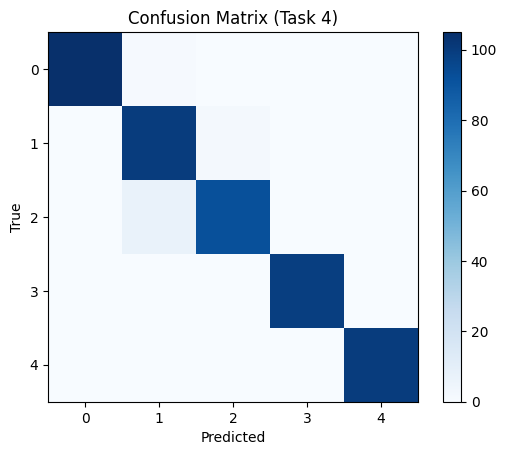


Classification Report:

              precision    recall  f1-score   support

        KIRC       1.00      0.99      1.00       527
        LUAD       0.89      0.97      0.93       510
        LUSC       0.97      0.89      0.92       498
        PRAD       1.00      1.00      1.00       493
        THCA       1.00      1.00      1.00       501

    accuracy                           0.97      2529
   macro avg       0.97      0.97      0.97      2529
weighted avg       0.97      0.97      0.97      2529



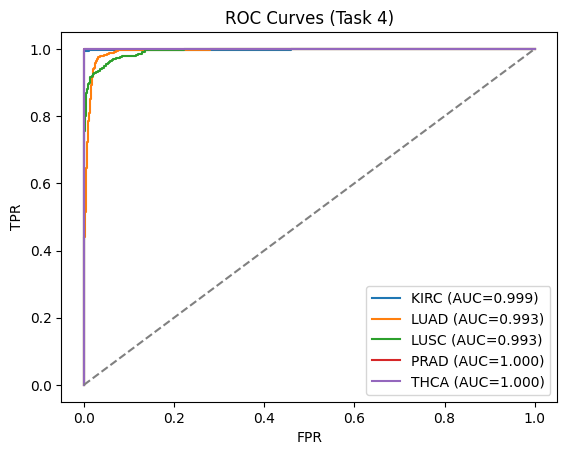

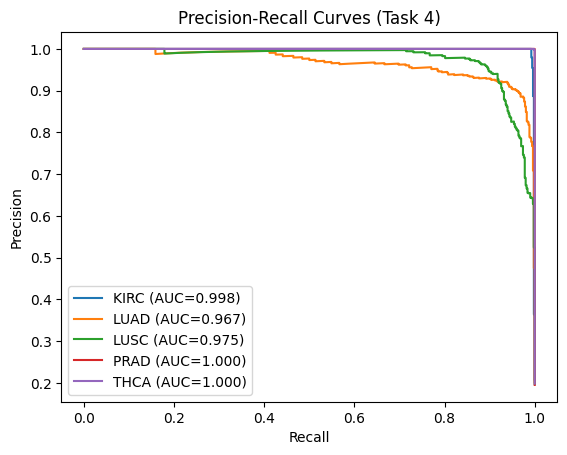

In [ ]:
# ---------------------------
# 1. Imports & setup
# ---------------------------
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tensorflow.keras import backend as K
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer, Input, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.initializers import Constant, glorot_normal
from tensorflow.keras.optimizers import Adam

from sklearn.preprocessing import LabelEncoder, StandardScaler, label_binarize
from sklearn.pipeline import Pipeline
from sklearn.model_selection import StratifiedKFold, cross_val_predict
from sklearn.svm import SVC
from sklearn.metrics import (
    confusion_matrix, classification_report,
    roc_curve, auc, precision_recall_curve
)

!pip install tensorflow==2.12.0 concrete-autoencoder
!pip install concrete-autoencoder
from concrete_autoencoder import ConcreteAutoencoderFeatureSelector

# Patch missing Keras functions for TF >= 2.12
if not hasattr(K, "set_learning_phase"):
    K.set_learning_phase = lambda x: None
if not hasattr(K, "constant"):
    K.constant = tf.constant

# ---------------------------
# 2. ConcreteAutoencoderFeatureSelector class
# ---------------------------
class ConcreteSelect(Layer):
    def __init__(self, output_dim, start_temp=10.0, min_temp=0.1, alpha=0.99999, **kwargs):
        self.output_dim = output_dim
        self.start_temp = start_temp
        self.min_temp = K.constant(min_temp)
        self.alpha = K.constant(alpha)
        super(ConcreteSelect, self).__init__(**kwargs)

    def build(self, input_shape):
        self.temp = self.add_weight(
            name="temp",
            shape=[],
            initializer=Constant(self.start_temp),
            trainable=False,
        )
        self.logits = self.add_weight(
            name="logits",
            shape=(self.output_dim, input_shape[1]),
            initializer=glorot_normal(),
            trainable=True,
        )
        super(ConcreteSelect, self).build(input_shape)

    def call(self, X, training=None):
        uniform = K.random_uniform(self.logits.shape, K.epsilon(), 1.0)
        gumbel = -K.log(-K.log(uniform))

        # update temperature manually (instead of K.update)
        new_temp = K.maximum(self.min_temp, self.temp * self.alpha)
        self.temp.assign(new_temp)

        noisy_logits = (self.logits + gumbel) / self.temp
        samples = K.softmax(noisy_logits)

        discrete_logits = K.one_hot(K.argmax(self.logits), self.logits.shape[1])

        # use tf.cond instead of K.in_train_phase
        if training is None:
            training = K.learning_phase()

        selections = tf.cond(
            tf.cast(training, tf.bool),
            lambda: samples,
            lambda: tf.cast(discrete_logits, tf.float32),
        )

        self.selections = selections
        Y = K.dot(X, K.transpose(selections))
        return Y

    def compute_output_shape(self, input_shape):
        return (input_shape[0], self.output_dim)

class StopperCallback(EarlyStopping):
    def __init__(self, mean_max_target=0.998):
        self.mean_max_target = mean_max_target
        super(StopperCallback, self).__init__(monitor='', patience=float('inf'), mode='max')

    def on_epoch_begin(self, epoch, logs=None):
        monitor_value = K.get_value(
            K.mean(K.max(K.softmax(self.model.get_layer('concrete_select').logits), axis=-1))
        )
        print(f'Epoch {epoch}: mean max prob={monitor_value:.4f}, temp={K.get_value(self.model.get_layer("concrete_select").temp):.4f}')

class ConcreteAutoencoderFeatureSelector():
    def __init__(self, K, output_function, num_epochs=100, batch_size=None, learning_rate=0.001,
                 start_temp=10.0, min_temp=0.1, tryout_limit=5):
        self.K = K
        self.output_function = output_function
        self.num_epochs = num_epochs
        self.batch_size = batch_size
        self.learning_rate = learning_rate
        self.start_temp = start_temp
        self.min_temp = min_temp
        self.tryout_limit = tryout_limit

    def fit(self, X, Y=None, val_X=None, val_Y=None):
        if Y is None:
            Y = X
        if self.batch_size is None:
            self.batch_size = max(len(X) // 256, 16)
        num_epochs = self.num_epochs
        steps_per_epoch = (len(X) + self.batch_size - 1) // self.batch_size

        for i in range(self.tryout_limit):
            inputs = Input(shape=X.shape[1:])
            alpha = math.exp(math.log(self.min_temp / self.start_temp) / (num_epochs * steps_per_epoch))
            self.concrete_select = ConcreteSelect(self.K, self.start_temp, self.min_temp, alpha, name='concrete_select')
            selected_features = self.concrete_select(inputs)
            outputs = self.output_function(selected_features)
            self.model = Model(inputs, outputs)
            self.model.compile(Adam(self.learning_rate), loss='mse')

            stopper = StopperCallback()
            self.model.fit(X, Y, self.batch_size, num_epochs, verbose=1, callbacks=[stopper])
            if K.get_value(K.mean(K.max(K.softmax(self.concrete_select.logits, axis=-1)))) >= stopper.mean_max_target:
                break
            num_epochs *= 2

        self.probabilities = K.get_value(K.softmax(self.model.get_layer('concrete_select').logits))
        self.indices = K.get_value(K.argmax(self.model.get_layer('concrete_select').logits))
        return self

    def get_support(self, indices=False):
        return self.indices if indices else self.probabilities

# ---------------------------
# 3. Data prep
# ---------------------------
X_features = df.drop(columns=["Ensembl_ID", "Class"])
y = df["Class"]

def decoder(x):
    x = Dense(200, activation="relu")(x)
    x = Dense(X_features.shape[1], activation="linear")(x)
    return x

selector = ConcreteAutoencoderFeatureSelector(K=50, output_function=decoder, num_epochs=50, batch_size=64)
selector.fit(X_features.values, X_features.values)

selected_idx = selector.get_support(indices=True)
selected_features = X_features.columns[selected_idx]
print("Selected features (first 10):", selected_features[:10])

X_selected = X_features[selected_features]

# ---------------------------
# 4. SVM evaluation
# ---------------------------
le = LabelEncoder()
y_enc = le.fit_transform(y)
class_names = le.classes_

svm = Pipeline([
    ("scaler", StandardScaler()),
    ("svc", SVC(kernel="rbf", probability=True, random_state=42))
])
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# (i) Confusion matrix (first fold)
train_idx, test_idx = next(cv.split(X_selected, y_enc))
svm.fit(X_selected.iloc[train_idx], y_enc[train_idx])
y_pred_fold = svm.predict(X_selected.iloc[test_idx])
cm = confusion_matrix(y_enc[test_idx], y_pred_fold)
print("\nConfusion Matrix (first fold):\n", cm)

plt.imshow(cm, cmap="Blues")
plt.title("Confusion Matrix (Task 4)")
plt.colorbar()
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# (ii) Classification report
y_pred_cv = cross_val_predict(svm, X_selected, y_enc, cv=cv, method="predict")
y_prob_cv = cross_val_predict(svm, X_selected, y_enc, cv=cv, method="predict_proba")
print("\nClassification Report:\n")
print(classification_report(y_enc, y_pred_cv, target_names=class_names))

# (iii) ROC & PR curves
y_bin = label_binarize(y_enc, classes=np.arange(len(class_names)))

# ROC
for i, cls in enumerate(class_names):
    fpr, tpr, _ = roc_curve(y_bin[:, i], y_prob_cv[:, i])
    plt.plot(fpr, tpr, label=f"{cls} (AUC={auc(fpr,tpr):.3f})")
plt.plot([0,1],[0,1],"--",color="gray")
plt.title("ROC Curves (Task 4)")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend()
plt.show()

# PR
for i, cls in enumerate(class_names):
    prec, rec, _ = precision_recall_curve(y_bin[:, i], y_prob_cv[:, i])
    plt.plot(rec, prec, label=f"{cls} (AUC={auc(rec,prec):.3f})")
plt.title("Precision-Recall Curves (Task 4)")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend()
plt.show()


# Homework 2

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
# Loading the CSV in colab
df = pd.read_csv("lncRNA_5_Cancers.csv")

# Peek at the data
print(df.shape)
df.head()



(2529, 12311)


Ensembl_ID  ENSG00000005206.15  ENSG00000083622.8  \
0  TCGA-3Z-A93Z-01A            3.390813                0.0   
1  TCGA-6D-AA2E-01A            3.144547                0.0   
2  TCGA-A3-3306-01A            2.484817                0.0   
3  TCGA-A3-3307-01A            2.789058                0.0   
4  TCGA-A3-3308-01A            3.258763                0.0   

   ENSG00000088970.14  ENSG00000099869.7  ENSG00000100181.20  \
0            2.918265           0.014832            0.341984   
1            1.961410           0.047186            1.677598   
2            2.896470           0.000000            0.087972   
3            2.439171           0.022316            0.502293   
4            1.941660           0.050283            0.098625   

   ENSG00000104691.13  ENSG00000115934.11  ENSG00000117242.7  \
0            2.194036                 0.0           1.569750   
1            2.605298                 0.0           1.180583   
2            3.176764                 0.0           1.690582   
3            2.679842                 0.0           1.659525   
4            2.841588                 0.0           1.296678   

   ENSG00000118412.11  ...  ENSGR0000223511.4  ENSGR0000223571.4  \
0            1.159419  ...                0.0                0.0   
1            1.127571  ...                0.0                0.0   
2            1.161923  ...                0.0                0.0   
3            1.463067  ...                0.0                0.0   
4            1.728514  ...                0.0                0.0   

   ENSGR0000226179.4  ENSGR0000230542.4  ENSGR0000234622.4  ENSGR0000236017.6  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   ENSGR0000236871.5  ENSGR0000237531.4  ENSGR0000270726.4  Class  
0                0.0                0.0                0.0   KIRC  
1                0.0                0.0                0.0   KIRC  
2                0.0                0.0                0.0   KIRC  
3                0.0                0.0                0.0   KIRC  
4                0.0                0.0                0.0   KIRC  

[5 rows x 12311 columns]

Task 1


*   Visualize the lncRNA expression data of five different cancer types using PCA.
*   Reduce the data dimension from 12,309 to two (PC1 and PC2) dimensions and plot the data into reduced dimensions.
*   Must plot all the data of five cancer types.







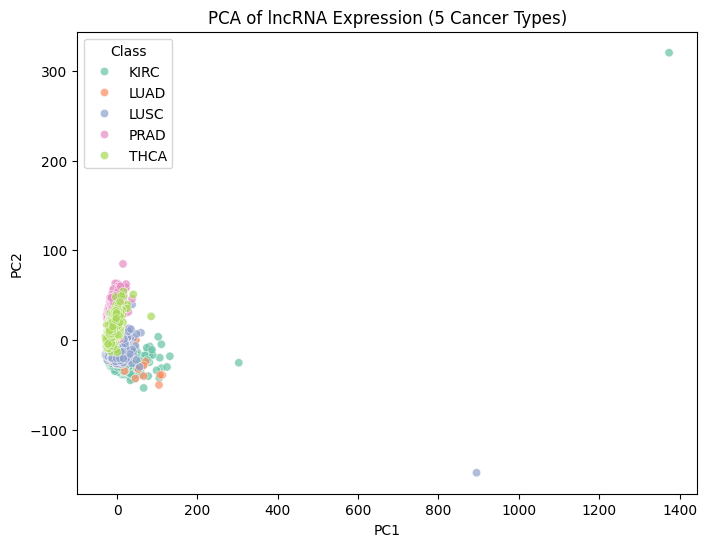

In [ ]:

# Drop non-numeric columns (like SampleID and Class)
X = df.drop(columns=["Class", "Ensembl_ID"])
y = df["Class"]

# Standardize features
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Create DataFrame
pca_df = pd.DataFrame(data=X_pca, columns=["PC1", "PC2"])
pca_df["Class"] = y.values

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=pca_df,
    x="PC1", y="PC2",
    hue="Class",
    palette="Set2",
    alpha=0.7
)
plt.title("PCA of lncRNA Expression (5 Cancer Types)")
plt.show()


Task 2
Draw two violon plots ‚Äì one with the values of PC1 and the other with
PC2.

/tmp/ipython-input-3186022873.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class", y="PC1", data=pca_df, palette="Set2")


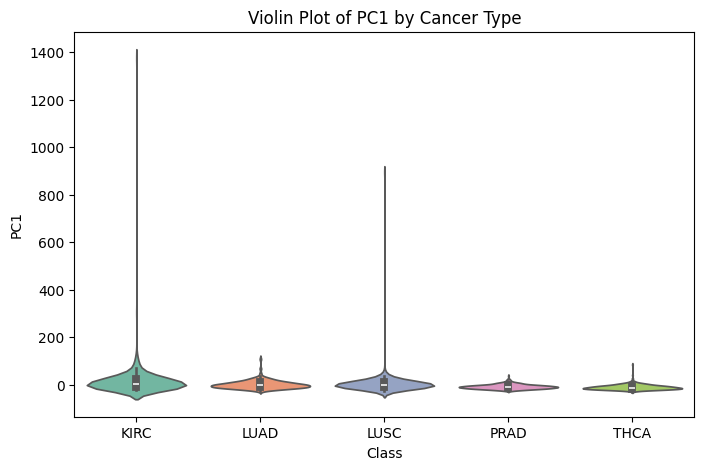

/tmp/ipython-input-3186022873.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class", y="PC2", data=pca_df, palette="Set2")


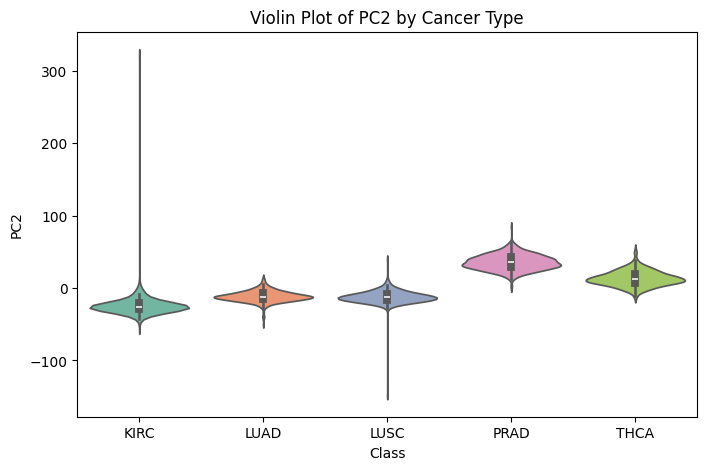

In [ ]:
# Violin plot for PC1
plt.figure(figsize=(8,5))
sns.violinplot(x="Class", y="PC1", data=pca_df, palette="Set2")
plt.title("Violin Plot of PC1 by Cancer Type")
plt.show()

# Violin plot for PC2
plt.figure(figsize=(8,5))
sns.violinplot(x="Class", y="PC2", data=pca_df, palette="Set2")
plt.title("Violin Plot of PC2 by Cancer Type")
plt.show()


Task 3
* Repeat task 1 using t-SNE library.
* Plot the data in reduced dimension using two t-SNE components (t-SNE 1 and t-SNE 2).

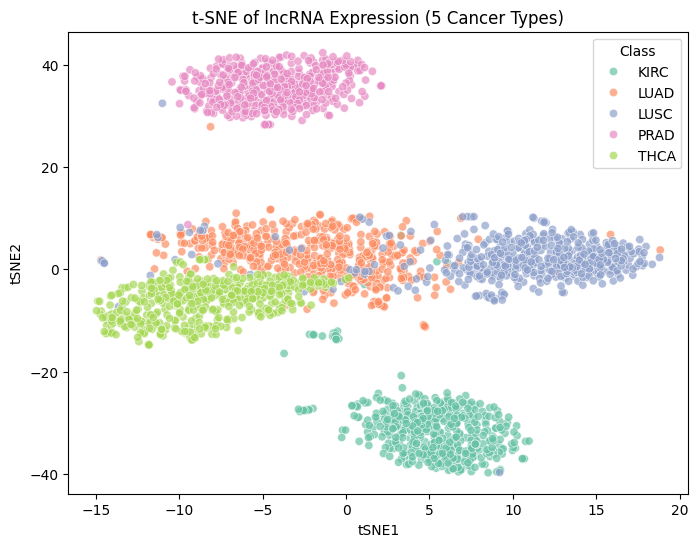

In [ ]:
from sklearn.manifold import TSNE

# Apply t-SNE (reduce to 2 dimensions)
tsne = TSNE(n_components=2, perplexity=50, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# Put into DataFrame for plotting
tsne_df = pd.DataFrame(data=X_tsne, columns=["tSNE1", "tSNE2"])
tsne_df["Class"] = y.values

# Plot
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=tsne_df,
    x="tSNE1", y="tSNE2",
    hue="Class",
    palette="Set2",
    alpha=0.7
)
plt.title("t-SNE of lncRNA Expression (5 Cancer Types)")
plt.show()


Task 4
 Draw two violon plots ‚Äì one with the values of t-SNE 1 and the other with tSNE 2.

/tmp/ipython-input-2031718986.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class", y="tSNE1", data=tsne_df, palette="Set2")


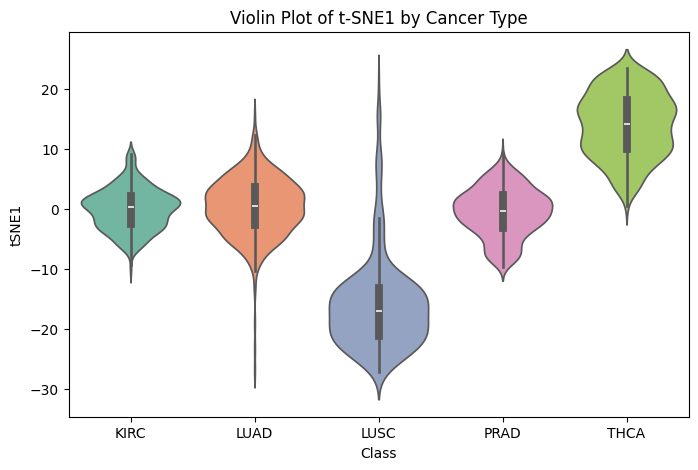

/tmp/ipython-input-2031718986.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x="Class", y="tSNE2", data=tsne_df, palette="Set2")


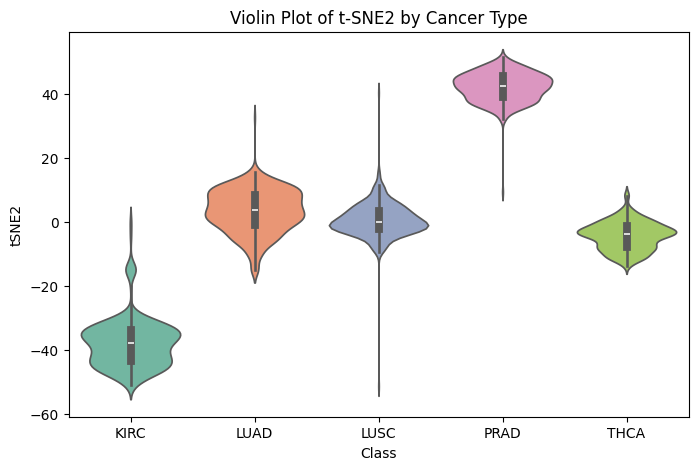

In [ ]:
# Violin plot for t-SNE1
plt.figure(figsize=(8,5))
# sns.violinplot(x="Class", y="tSNE1", data=tsne_df, palette="Set2")
sns.violinplot(x="Class", y="tSNE1", data=tsne_df, palette="Set2")
plt.title("Violin Plot of t-SNE1 by Cancer Type")
plt.show()

# Violin plot for t-SNE2
plt.figure(figsize=(8,5))
# sns.violinplot(x="Class", y="tSNE2", data=tsne_df, palette="Set2")
sns.violinplot(x="Class", y="tSNE2", data=tsne_df, palette="Set2")
plt.title("Violin Plot of t-SNE2 by Cancer Type")
plt.show()


* Find the best Tree-based classifier applying ALL the algorithms listed
above.
* Use the metrics Accuracy and F1 score.

Decision Tree

In [ ]:
# Importing the libraries to be used
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import StandardScaler
# from sklearn.metrics import accuracy_score, f1_score

import pandas as pd
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import make_scorer, f1_score, accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
import xgboost as xgb
import lightgbm as lgb
from catboost import CatBoostClassifier

In [ ]:
# Loading the CSV in colab
df = pd.read_csv("lncRNA_5_Cancers.csv")

# Peek at the data
print(df.shape)
df.head()


(2529, 12311)


Ensembl_ID  ENSG00000005206.15  ENSG00000083622.8  \
0  TCGA-3Z-A93Z-01A            3.390813                0.0   
1  TCGA-6D-AA2E-01A            3.144547                0.0   
2  TCGA-A3-3306-01A            2.484817                0.0   
3  TCGA-A3-3307-01A            2.789058                0.0   
4  TCGA-A3-3308-01A            3.258763                0.0   

   ENSG00000088970.14  ENSG00000099869.7  ENSG00000100181.20  \
0            2.918265           0.014832            0.341984   
1            1.961410           0.047186            1.677598   
2            2.896470           0.000000            0.087972   
3            2.439171           0.022316            0.502293   
4            1.941660           0.050283            0.098625   

   ENSG00000104691.13  ENSG00000115934.11  ENSG00000117242.7  \
0            2.194036                 0.0           1.569750   
1            2.605298                 0.0           1.180583   
2            3.176764                 0.0           1.690582   
3            2.679842                 0.0           1.659525   
4            2.841588                 0.0           1.296678   

   ENSG00000118412.11  ...  ENSGR0000223511.4  ENSGR0000223571.4  \
0            1.159419  ...                0.0                0.0   
1            1.127571  ...                0.0                0.0   
2            1.161923  ...                0.0                0.0   
3            1.463067  ...                0.0                0.0   
4            1.728514  ...                0.0                0.0   

   ENSGR0000226179.4  ENSGR0000230542.4  ENSGR0000234622.4  ENSGR0000236017.6  \
0                0.0                0.0                0.0                0.0   
1                0.0                0.0                0.0                0.0   
2                0.0                0.0                0.0                0.0   
3                0.0                0.0                0.0                0.0   
4                0.0                0.0                0.0                0.0   

   ENSGR0000236871.5  ENSGR0000237531.4  ENSGR0000270726.4  Class  
0                0.0                0.0                0.0   KIRC  
1                0.0                0.0                0.0   KIRC  
2                0.0                0.0                0.0   KIRC  
3                0.0                0.0                0.0   KIRC  
4                0.0                0.0                0.0   KIRC  

[5 rows x 12311 columns]

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Features and target
X = df.drop(columns=["Class", "Ensembl_ID"])
y = df["Class"]

# Encode target for XGBoost, LightGBM, CatBoost
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Optional train/test split for final evaluation
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Initialize the Decision Tree Classifier
dt_model = DecisionTreeClassifier(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Make predictions
y_pred_dt = dt_model.predict(X_test)

# Calculate Accuracy and F1 Score
accuracy_dt = accuracy_score(y_test, y_pred_dt)
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')  # Weighted F1-score

# Print results
print(f"Decision Tree - Accuracy: {accuracy_dt}, F1 Score: {f1_dt}")



Decision Tree - Accuracy: 0.9354413702239789, F1 Score: 0.9356521889260635


Random Forests

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Initialize the Random Forest Classifier
rf_model = RandomForestClassifier(random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_model.predict(X_test)

# Calculate Accuracy and F1 Score
accuracy_rf = accuracy_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf, average='weighted')

# Print results
print(f"Random Forest - Accuracy: {accuracy_rf}, F1 Score: {f1_rf}")


Random Forest - Accuracy: 0.9789196310935442, F1 Score: 0.9789255726870296


Gradient Boosting Machines (GBM)

XGBoost Classifier

In [ ]:
# import xgboost as xgb

# # Initialize the XGBoost Classifier
# xgb_model = xgb.XGBClassifier(random_state=42)

# # Train the model
# xgb_model.fit(X_train, y_train)

# # Make predictions
# y_pred_xgb = xgb_model.predict(X_test)

# # Calculate Accuracy and F1 Score
# accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
# f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# # Print results
# print(f"XGBoost - Accuracy: {accuracy_xgb}, F1 Score: {f1_xgb}")

from sklearn.preprocessing import LabelEncoder

# Initialize the label encoder
label_encoder = LabelEncoder()

# Fit and transform the target variable (y) to numeric values
y_encoded = label_encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_encoded, test_size=0.3, random_state=42)

import xgboost as xgb

# Initialize the XGBoost Classifier
xgb_model = xgb.XGBClassifier(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Make predictions
y_pred_xgb = xgb_model.predict(X_test)

# Calculate Accuracy and F1 Score
accuracy_xgb = accuracy_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb, average='weighted')

# Print results
print(f"XGBoost - Accuracy: {accuracy_xgb}, F1 Score: {f1_xgb}")


XGBoost - Accuracy: 0.9736495388669302, F1 Score: 0.9736520011636723


LightGBM Classifier

In [ ]:
import lightgbm as lgb

# Initialize the LightGBM Classifier
lgb_model = lgb.LGBMClassifier(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Make predictions
y_pred_lgb = lgb_model.predict(X_test)

# Calculate Accuracy and F1 Score
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
f1_lgb = f1_score(y_test, y_pred_lgb, average='weighted')

# Print results
print(f"LightGBM - Accuracy: {accuracy_lgb}, F1 Score: {f1_lgb}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.531656 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2307629
[LightGBM] [Info] Number of data points in the train set: 1770, number of used features: 12067
[LightGBM] [Info] Start training from score -1.570652
[LightGBM] [Info] Start training from score -1.573373
[LightGBM] [Info] Start training from score -1.643924
[LightGBM] [Info] Start training from score -1.664604
[LightGBM] [Info] Start training from score -1.598202
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMClassifier was fitted with feature names
  warnings.warn(


CatBoost Classifier

In [ ]:
!pip install catboost
from catboost import CatBoostClassifier

# Initialize the CatBoost Classifier
cat_model = CatBoostClassifier(learning_rate=0.1, iterations=1000, random_state=42, verbose=0)

# Train the model
cat_model.fit(X_train, y_train)

# Make predictions
y_pred_cat = cat_model.predict(X_test)

# Calculate Accuracy and F1 Score
accuracy_cat = accuracy_score(y_test, y_pred_cat)
f1_cat = f1_score(y_test, y_pred_cat, average='weighted')

# Print results
print(f"CatBoost - Accuracy: {accuracy_cat}, F1 Score: {f1_cat}")


   ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ‚îÅ 99.2/99.2 MB 26.4 MB/s eta 0:00:00
CatBoost - Accuracy: 0.9789196310935442, F1 Score: 0.9789255726870296


 Task 2
 Apply SHAP on the best classifier found in Task 1.

1.   Find each cancerspecific 10 significant features.
2.   Show force plots for one patient (ID: TCGA-39-5011-01A) for five cancer types.




# Homework 3 using 1 K-Fold Cross-Validation

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score

# Load dataset
df = pd.read_csv("lncRNA_5_Cancers.csv")

# Features and target
X = df.drop(columns=["Class", "Ensembl_ID"])
y = df["Class"]  # Use string labels for sklearn trees

# Encode target for XGBoost, LightGBM, CatBoost
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Scale features (optional for trees)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred = dt_model.predict(X_test)

dt_acc = accuracy_score(y_test, y_pred)
dt_f1 = f1_score(y_test, y_pred, average='weighted')

print("Decision Tree Results:")
# print(f"Accuracy: {acc:.4f}")
# print(f"F1 Score: {f1:.4f}\n")
print("Accuracy:", np.mean(dt_acc))
print("F1 Score:", np.mean(dt_f1))


Decision Tree Results:
Accuracy: 0.9407114624505929
F1 Score: 0.9409456947347841


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)

rf_acc = accuracy_score(y_test, y_pred)
rf_f1 = f1_score(y_test, y_pred, average='weighted')

print("Random Forest Results:")
# print(f"Accuracy: {acc:.4f}")
# print(f"F1 Score: {f1:.4f}\n")
print("Accuracy:", np.mean(rf_acc))
print("F1 Score:", np.mean(rf_f1))


Random Forest Results:
Accuracy: 0.9703557312252964
F1 Score: 0.9703098704357473


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier

gb_model = GradientBoostingClassifier(n_estimators=50, max_depth=2, learning_rate=0.1, random_state=42)
gb_model.fit(X_train, y_train)
y_pred = gb_model.predict(X_test)

gb_acc = accuracy_score(y_test, y_pred)
gb_f1 = f1_score(y_test, y_pred, average='weighted')

print("Gradient Boosting Results:")
# print(f"Accuracy: {acc:.4f}")
# print(f"F1 Score: {f1:.4f}\n")
print("Accuracy:", np.mean(gb_acc))
print("F1 Score:", np.mean(gb_f1))


Gradient Boosting Results:
Accuracy: 0.9644268774703557
F1 Score: 0.9643989948150592


In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train, le.transform(y_train))  # numeric labels
y_pred = xgb_model.predict(X_test)
y_true = le.transform(y_test)

xgb_acc = accuracy_score(y_true, y_pred)
xgb_f1 = f1_score(y_true, y_pred, average='weighted')

print("XGBoost Results:")
# print(f"Accuracy: {acc:.4f}")
# print(f"F1 Score: {f1:.4f}\n")
print("Accuracy:", np.mean(xgb_acc))
print("F1 Score:", np.mean(xgb_f1))


XGBoost Results:
Accuracy: 0.9723320158102767
F1 Score: 0.9723265891192518


In [ ]:
from lightgbm import LGBMClassifier

lgb_model = LGBMClassifier(random_state=42)
lgb_model.fit(X_train, le.transform(y_train))  # numeric labels
y_pred = lgb_model.predict(X_test)
y_true = le.transform(y_test)

lgb_acc = accuracy_score(y_true, y_pred)
lgb_f1 = f1_score(y_true, y_pred, average='weighted')

print("LightGBM Results:")
# print(f"Accuracy: {acc:.4f}")
# print(f"F1 Score: {f1:.4f}\n")
print("Accuracy:", np.mean(lgb_acc))
print("F1 Score:", np.mean(lgb_f1))


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.632644 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2366579
[LightGBM] [Info] Number of data points in the train set: 2023, number of used features: 12095
[LightGBM] [Info] Start training from score -1.567332
[LightGBM] [Info] Start training from score -1.601070
[LightGBM] [Info] Start training from score -1.625885
[LightGBM] [Info] Start training from score -1.635986
[LightGBM] [Info] Start training from score -1.618375
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

In [ ]:
from catboost import CatBoostClassifier

cat_model = CatBoostClassifier(iterations=100, learning_rate=0.1, random_state=42, verbose=0)
cat_model.fit(X_train, le.transform(y_train))  # numeric labels
y_pred = cat_model.predict(X_test)
y_true = le.transform(y_test)

cb_acc = accuracy_score(y_true, y_pred)
cb_f1 = f1_score(y_true, y_pred, average='weighted')

print("CatBoost Results:")
# print(f"Accuracy: {acc:.4f}")
# print(f"F1 Score: {f1:.4f}\n")
print("Accuracy:", np.mean(cb_acc))
print("F1 Score:", np.mean(cb_f1))


CatBoost Results:
Accuracy: 0.9762845849802372
F1 Score: 0.9762706237861517


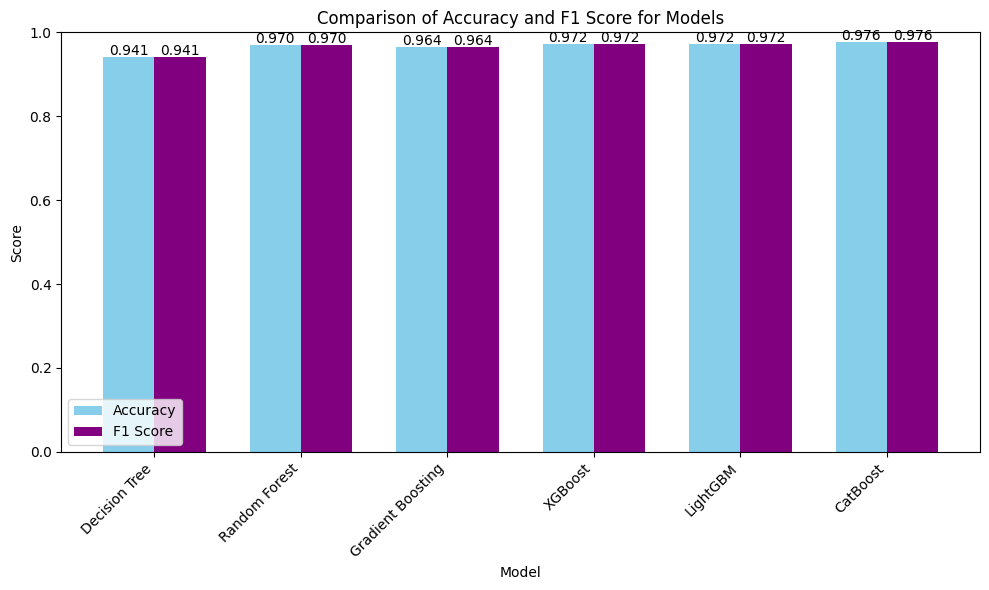

In [ ]:

# Example results (replace with your actual mean scores)
results = {
    "Model": ["Decision Tree", "Random Forest", "Gradient Boosting", "XGBoost", "LightGBM", "CatBoost"],
    "Accuracy": [np.mean(dt_acc), np.mean(rf_acc), np.mean(gb_acc), np.mean(xgb_acc), np.mean(lgb_acc), np.mean(cb_acc)],
    "F1 Score": [np.mean(dt_f1), np.mean(rf_f1), np.mean(gb_f1), np.mean(xgb_f1), np.mean(lgb_f1), np.mean(cb_f1)]
}

df_results = pd.DataFrame(results)

import matplotlib.pyplot as plt

# Set positions and width
x = np.arange(len(df_results["Model"]))
width = 0.35

# Create figure
fig, ax = plt.subplots(figsize=(10,6))

# Plot bars
ax.bar(x - width/2, df_results["Accuracy"], width, label="Accuracy", color='skyblue')
ax.bar(x + width/2, df_results["F1 Score"], width, label="F1 Score", color='purple')

# Labels and title
ax.set_ylabel("Score")
ax.set_xlabel("Model")
ax.set_title("Comparison of Accuracy and F1 Score for Models")
ax.set_xticks(x)
ax.set_xticklabels(df_results["Model"], rotation=45, ha='right')
ax.set_ylim(0, 1)  # Scores between 0 and 1
ax.legend()

# Show values on top of bars
for i in range(len(x)):
    ax.text(i - width/2, df_results["Accuracy"][i] + 0.005, f"{df_results['Accuracy'][i]:.3f}", ha='center')
    ax.text(i + width/2, df_results["F1 Score"][i] + 0.005, f"{df_results['F1 Score'][i]:.3f}", ha='center')

plt.tight_layout()
plt.show()

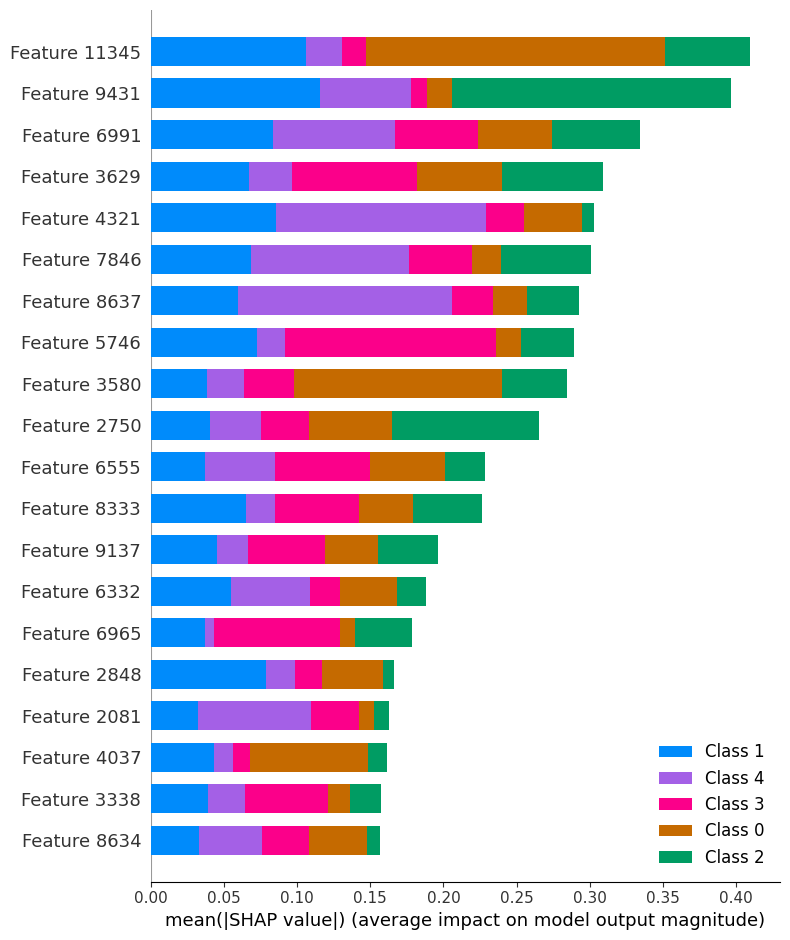


üîπ Top 10 Features for KIRC
      feature  mean_abs_shap
Feature_11345       0.204374
 Feature_3580       0.141966
 Feature_4037       0.080540
 Feature_2401       0.072215
 Feature_3629       0.058239
 Feature_2750       0.057287
 Feature_7838       0.054367
  Feature_248       0.052195
 Feature_6555       0.050856
 Feature_6991       0.050622

üîπ Top 10 Features for LUAD
      feature  mean_abs_shap
 Feature_9431       0.115591
Feature_11345       0.106148
 Feature_4321       0.085756
 Feature_6991       0.083361
 Feature_2848       0.078784
 Feature_5746       0.072699
 Feature_7846       0.068453
 Feature_3629       0.066799
 Feature_8333       0.065256
 Feature_8637       0.059875

üîπ Top 10 Features for LUSC
      feature  mean_abs_shap
 Feature_9431       0.190734
 Feature_2750       0.100077
 Feature_3629       0.068808
 Feature_7846       0.061805
Feature_10895       0.061687
 Feature_6991       0.060010
Feature_11345       0.057836
 Feature_2464       0.055696
 Feature

In [ ]:
import shap
explainer = shap.Explainer(cat_model)
shap_values = explainer(X_test)
shap.initjs()

shap.summary_plot(shap_values, X_test, plot_type="bar")


#Code that gets top 10 features for each cancer class

# Define class (cancer) names in same order as the model
cancer_types = ["KIRC", "LUAD", "LUSC", "PRAD", "THCA"]

# Get feature names
try:
    feature_names = X_test.columns
except AttributeError:
    feature_names = [f"Feature_{i}" for i in range(shap_values.values.shape[1])]

# Extract the raw SHAP array: (samples, features, classes)
values = shap_values.values

# --- Compute per-class mean |SHAP| across samples ---
all_classes_top10 = {}

for class_idx, cancer in enumerate(cancer_types):
    mean_abs_shap = np.abs(values[:, :, class_idx]).mean(axis=0)
    per_class_importance = (
        pd.DataFrame({
            "feature": feature_names,
            "mean_abs_shap": mean_abs_shap
        })
        .sort_values(by="mean_abs_shap", ascending=False)
        .head(10)
        .reset_index(drop=True)
    )
    all_classes_top10[cancer] = per_class_importance

# --- Display results ---
for cancer, df_top in all_classes_top10.items():
    print(f"\nüîπ Top 10 Features for {cancer}")
    print(df_top.to_string(index=False))



Showing each cancerspecific 10 significant features in a bar chat

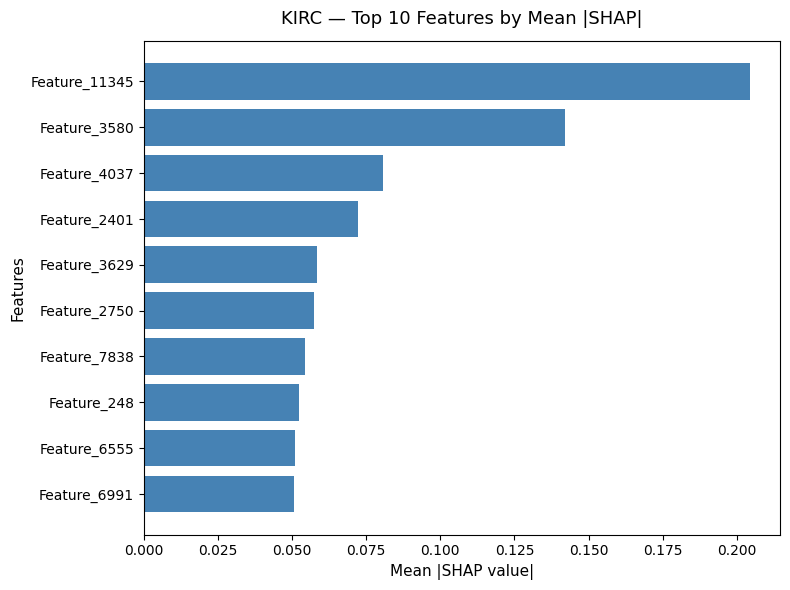

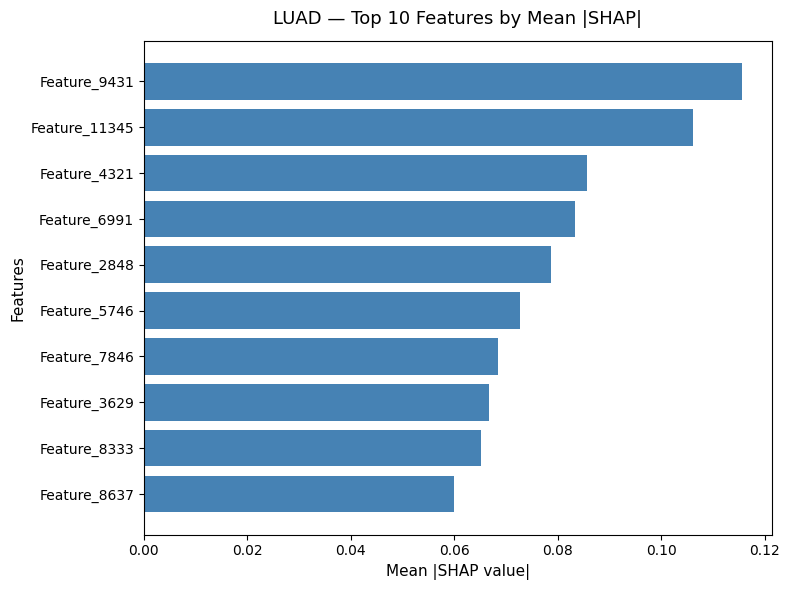

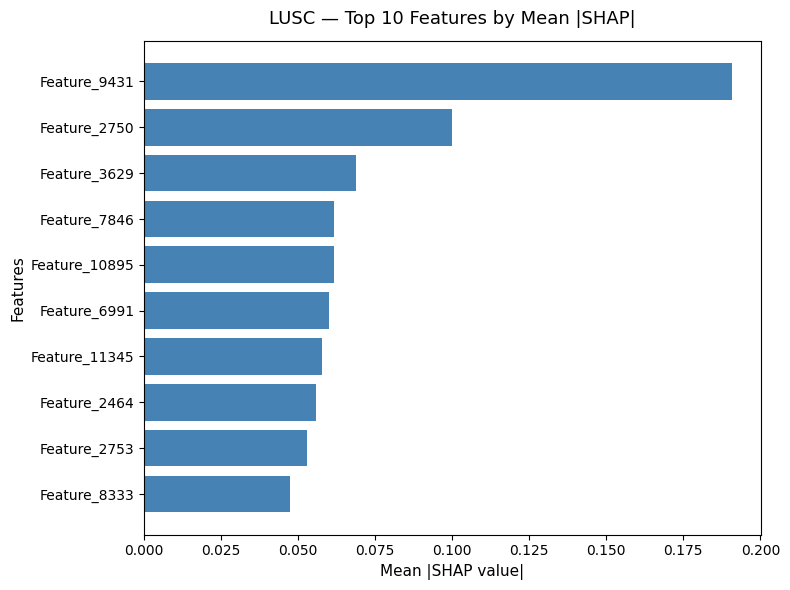

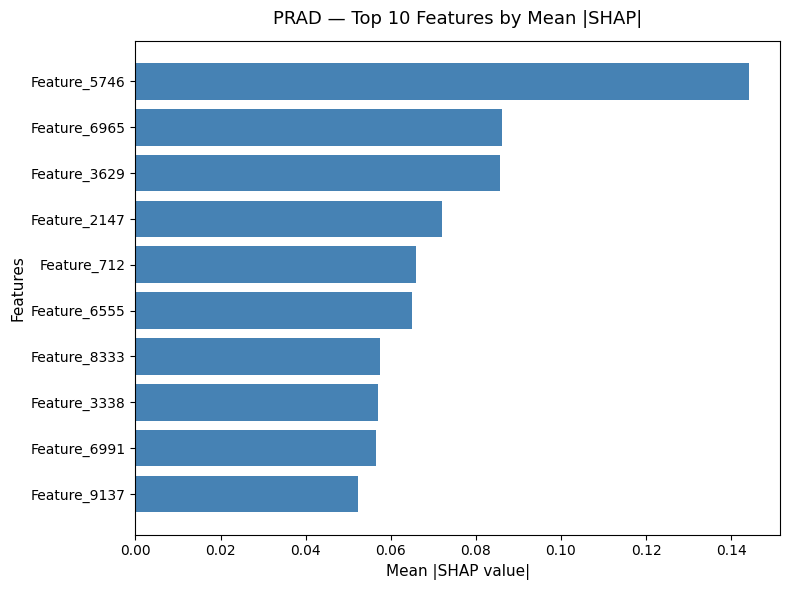

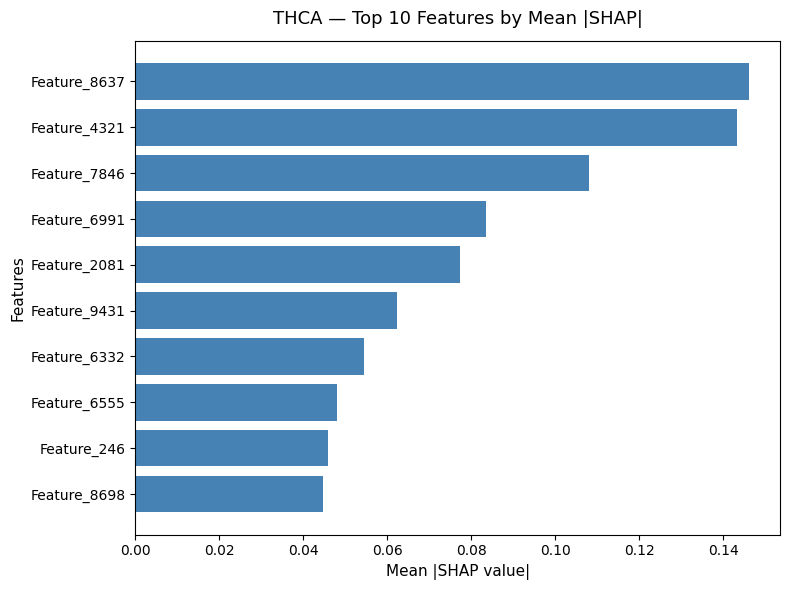

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

explainer = shap.Explainer(cat_model)
shap_values = explainer(X_test)

# define your class labels in the same order as the model
cancer_types = ["KIRC", "LUAD", "LUSC", "PRAD", "THCA"]

# get feature names
try:
    feature_names = X_test.columns
except AttributeError:
    feature_names = [f"Feature_{i}" for i in range(shap_values.values.shape[1])]

# extract 3-D SHAP array (samples √ó features √ó classes)
values = shap_values.values

# compute top-10 and plot per class
for class_idx, cancer in enumerate(cancer_types):
    mean_abs_shap = np.abs(values[:, :, class_idx]).mean(axis=0)
    df_top = (
        pd.DataFrame({
            "feature": feature_names,
            "mean_abs_shap": mean_abs_shap
        })
        .sort_values("mean_abs_shap", ascending=False)
        .head(10)
    )

    # --- plot ---
    plt.figure(figsize=(8, 6))
    plt.barh(df_top["feature"][::-1], df_top["mean_abs_shap"][::-1], color="steelblue")
    plt.title(f"{cancer} ‚Äî Top 10 Features by Mean |SHAP|", fontsize=13, pad=12)
    plt.xlabel("Mean |SHAP value|", fontsize=11)
    plt.ylabel("Features", fontsize=11)
    plt.tight_layout()
    plt.show()

(b) Show force plots for one patient (ID: TCGA-39-5011-01A)
for five cancer types.


üîπ Force Plot for Class: KIRC ‚Äî Patient TCGA-39-5011-01A


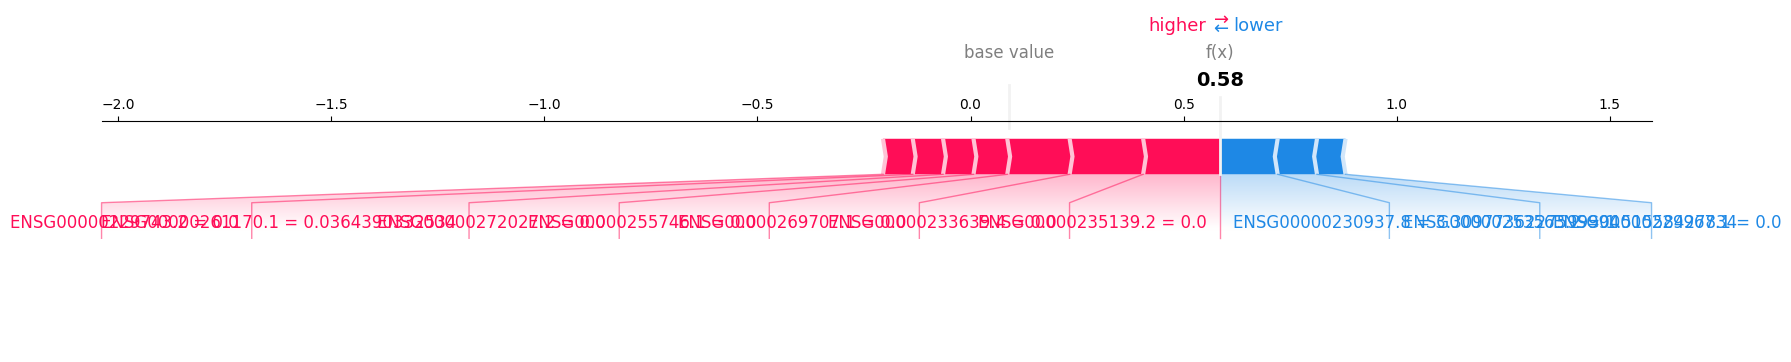


üîπ Force Plot for Class: LUAD ‚Äî Patient TCGA-39-5011-01A


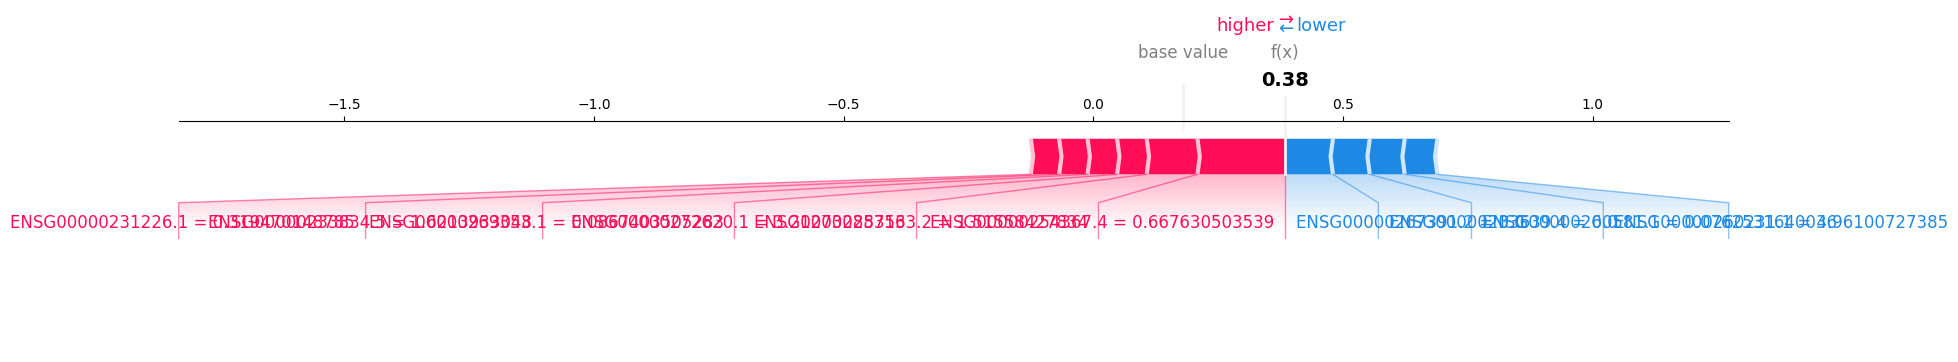


üîπ Force Plot for Class: LUSC ‚Äî Patient TCGA-39-5011-01A


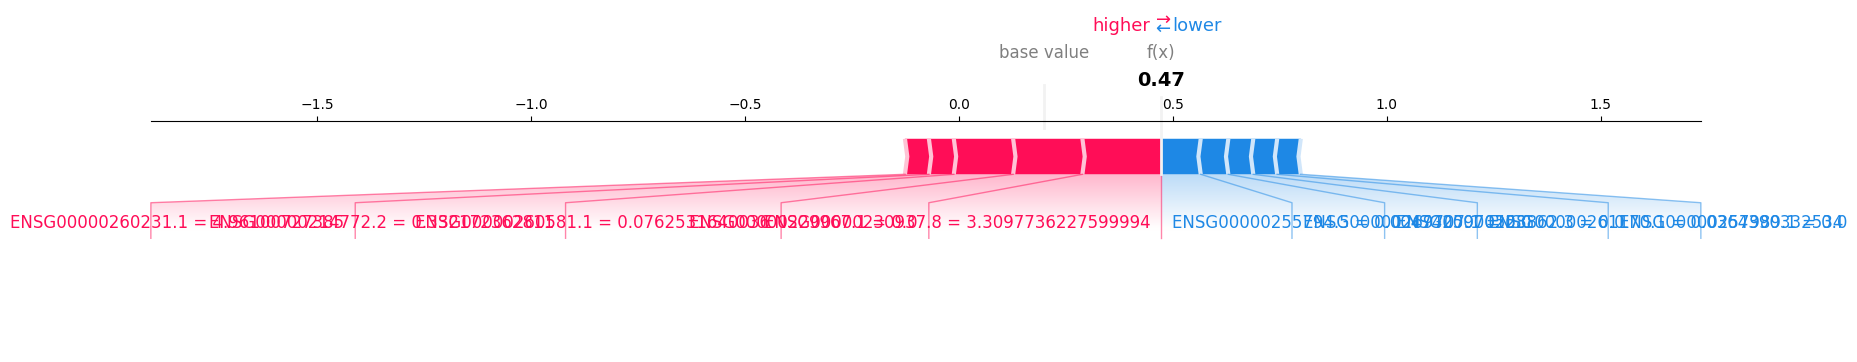


üîπ Force Plot for Class: PRAD ‚Äî Patient TCGA-39-5011-01A


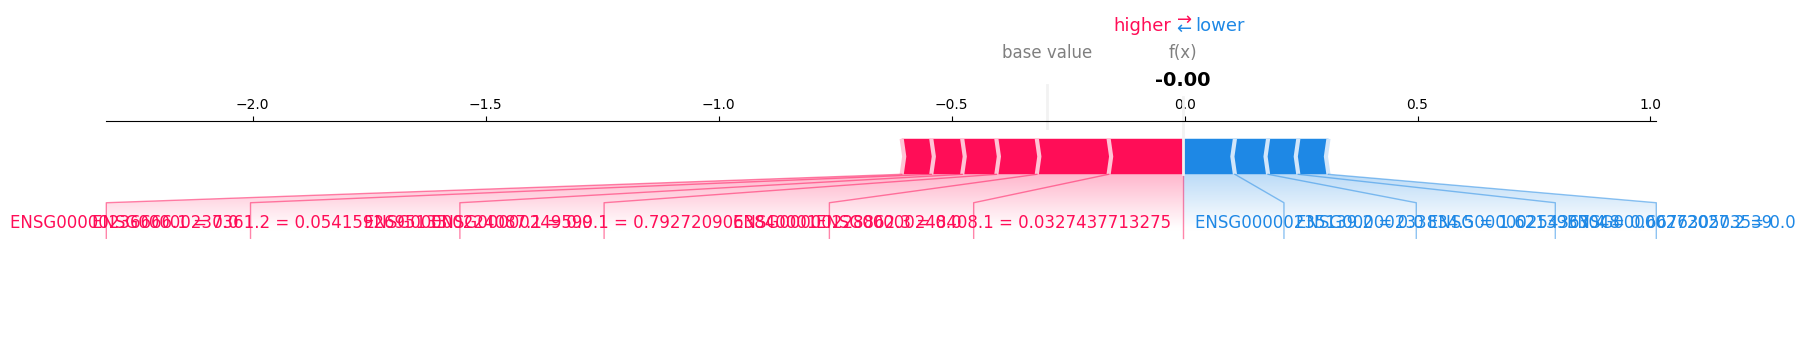


üîπ Force Plot for Class: THCA ‚Äî Patient TCGA-39-5011-01A


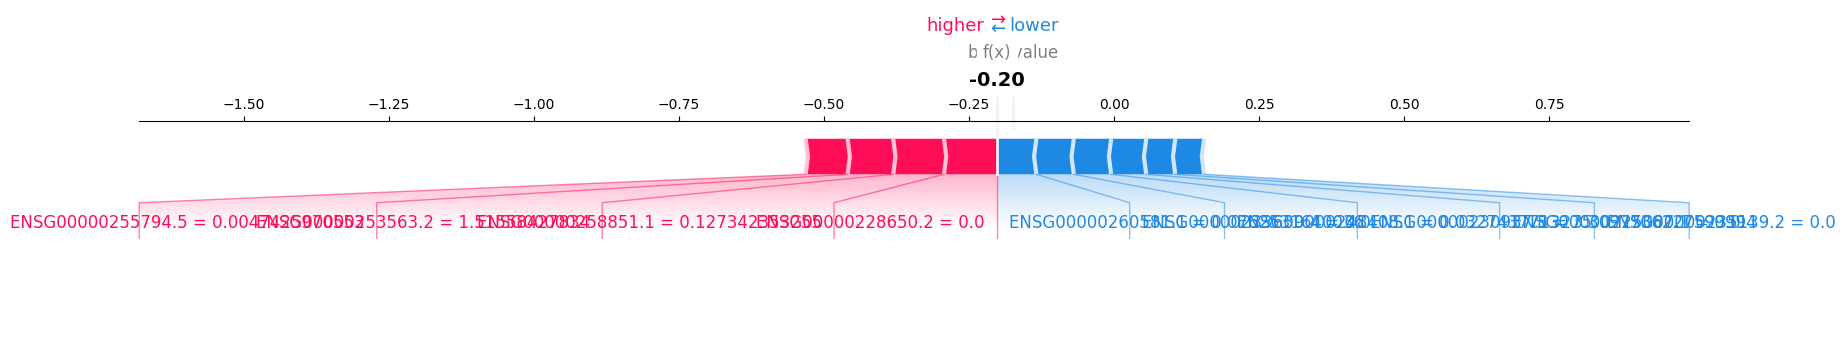

In [ ]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# --- SETUP ---
patient_id = "TCGA-39-5011-01A"
cancer_types = ["KIRC", "LUAD", "LUSC", "PRAD", "THCA"]

# ------------------------------------------------------------------
# 1Ô∏è‚É£ Locate the patient in your full dataset
# ------------------------------------------------------------------
patient_row = df[df["Ensembl_ID"] == patient_id]

if patient_row.empty:
    raise ValueError(f"‚ùå Patient ID '{patient_id}' not found in dataset!")

# Keep only numeric features
X_patient = patient_row.drop(columns=["Ensembl_ID", "Class"], errors="ignore")
feature_names = X_patient.columns.tolist()
X_patient_array = X_patient.to_numpy()

# ------------------------------------------------------------------
# 2Ô∏è‚É£ Compute SHAP values for that patient
# ------------------------------------------------------------------
explainer = shap.Explainer(cat_model)
shap_values_patient = explainer(X_patient_array)

# ------------------------------------------------------------------
# 3Ô∏è‚É£ Plot top 10 features for each class
# ------------------------------------------------------------------
for class_idx, cancer in enumerate(cancer_types):
    print(f"\nüîπ Force Plot for Class: {cancer} ‚Äî Patient {patient_id}")

    # --- Get SHAP values for this class ---
    shap_vals = shap_values_patient.values[0, :, class_idx]

    # --- Get indices of top 10 features by absolute SHAP value ---
    top10_idx = np.argsort(np.abs(shap_vals))[-10:]

    # --- Slice to top 10 features only ---
    top10_features = [feature_names[i] for i in top10_idx]
    top10_values = shap_vals[top10_idx]
    top10_inputs = X_patient_array[0, top10_idx]

    # --- Generate the force plot ---
    shap.plots.force(
        base_value=shap_values_patient.base_values[0, class_idx],
        shap_values=top10_values,
        features=top10_inputs,
        feature_names=top10_features,
        matplotlib=True,
        show=True
    )
